In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [6]:
READHR = 'l2_tex_read_hit_rate'
READTR = 'l2_tex_read_transactions'
WRITEHR = 'l2_tex_write_hit_rate'
WRITETR = 'l2_tex_write_transactions'

In [7]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [8]:
onegpu = pd.read_csv('./src/'+model+'/onegpu.csv')
onegpu = onegpu.drop(0)
onegpu = onegpu.dropna(subset=[READHR,READTR,WRITEHR,WRITETR])
onegpu = onegpu.reset_index(drop=True)

multigpu = pd.read_csv('./src/'+model+'/multigpu.csv')
multigpu = multigpu.drop(0)
multigpu = multigpu.dropna(subset=[READHR,READTR,WRITEHR,WRITETR])
multigpu = multigpu.reset_index(drop=True)


In [9]:
delimeter1 = find_delimeter(onegpu)
delimeter2 = find_delimeter(multigpu)

if delimeter1==delimeter2:
    delimeter = delimeter1
else:
    delimeter=int((delimeter1+delimeter2)/2)

In [12]:
RHR_one = onegpu[READHR].astype(float).to_numpy()
RTR_one = onegpu[READTR].astype(float).to_numpy()
WHR_one = onegpu[WRITEHR].astype(float).to_numpy()
WTR_one = onegpu[WRITETR].astype(float).to_numpy()

In [13]:
RHR_multi = multigpu[READHR].astype(float).to_numpy()
RTR_multi = multigpu[READTR].astype(float).to_numpy()
WHR_multi = multigpu[WRITEHR].astype(float).to_numpy()
WTR_multi = multigpu[WRITETR].astype(float).to_numpy()

In [15]:
readhits_one = RHR_one*RTR_one/100
writehits_one = WHR_one*WTR_one/100
readhits_multi = RHR_multi*RTR_multi/100
writehits_multi = WHR_multi*WTR_multi/100

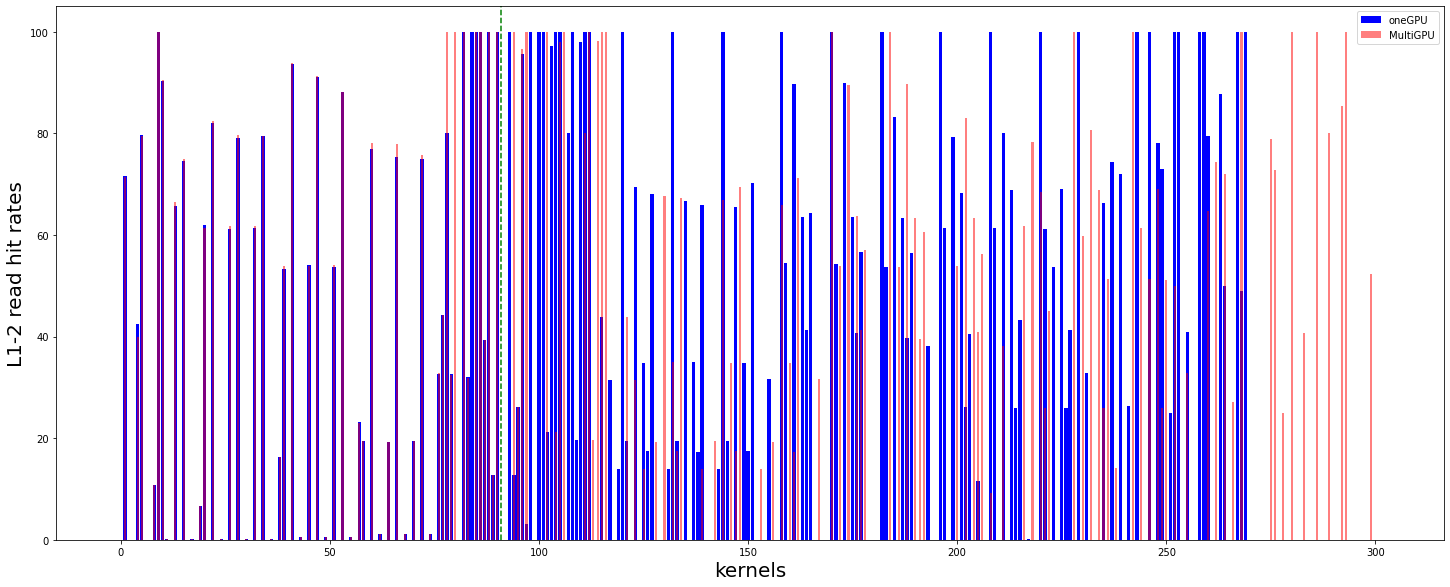

In [22]:
plot_bar_overlap(RHR_one, RHR_multi, delimeter=delimeter, ylabel='L1-2 read hit rates', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

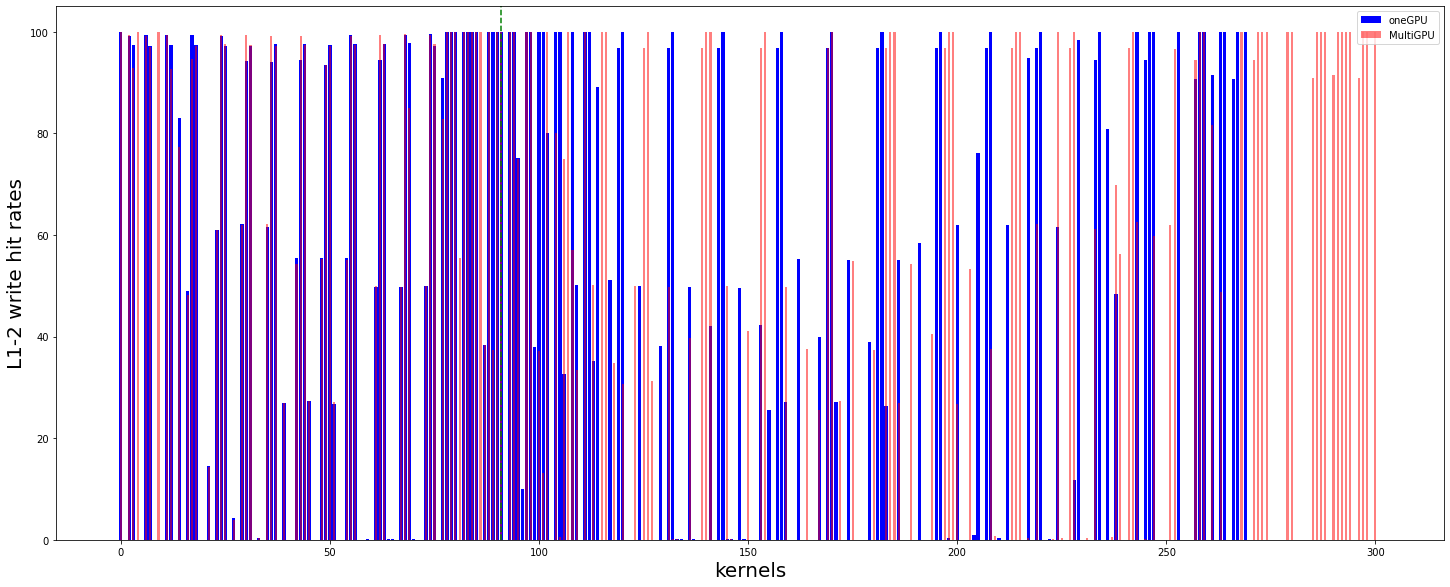

In [23]:
plot_bar_overlap(WHR_one, WHR_multi, delimeter=delimeter, ylabel='L1-2 write hit rates', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

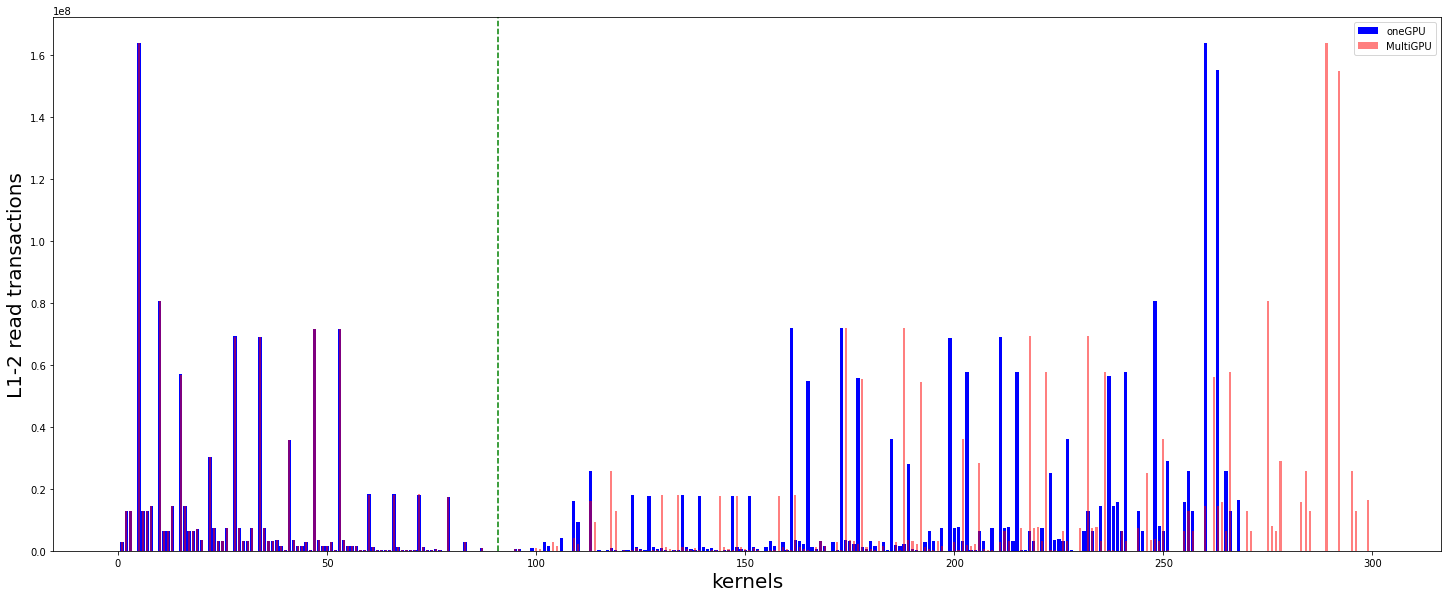

In [18]:
plot_bar_overlap(RTR_one, RTR_multi, delimeter=delimeter, ylabel='L1-2 read transactions', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

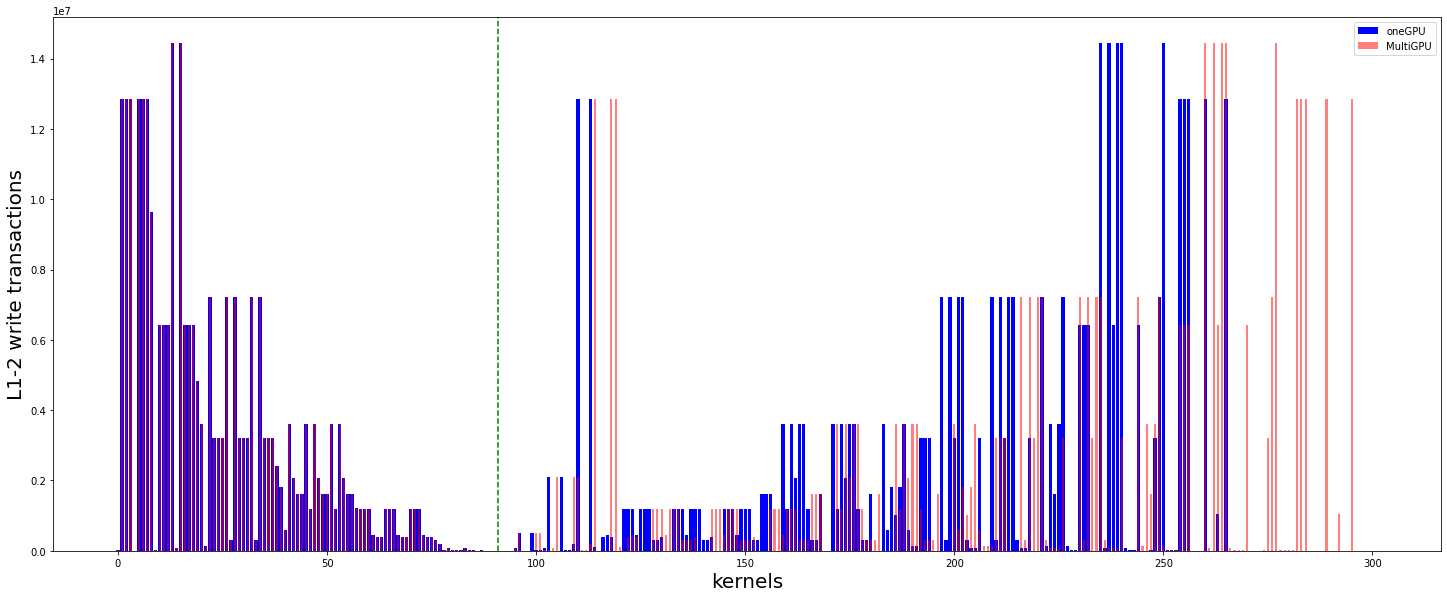

In [19]:
plot_bar_overlap(WTR_one, WTR_multi, delimeter=delimeter, ylabel='L1-2 write transactions', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

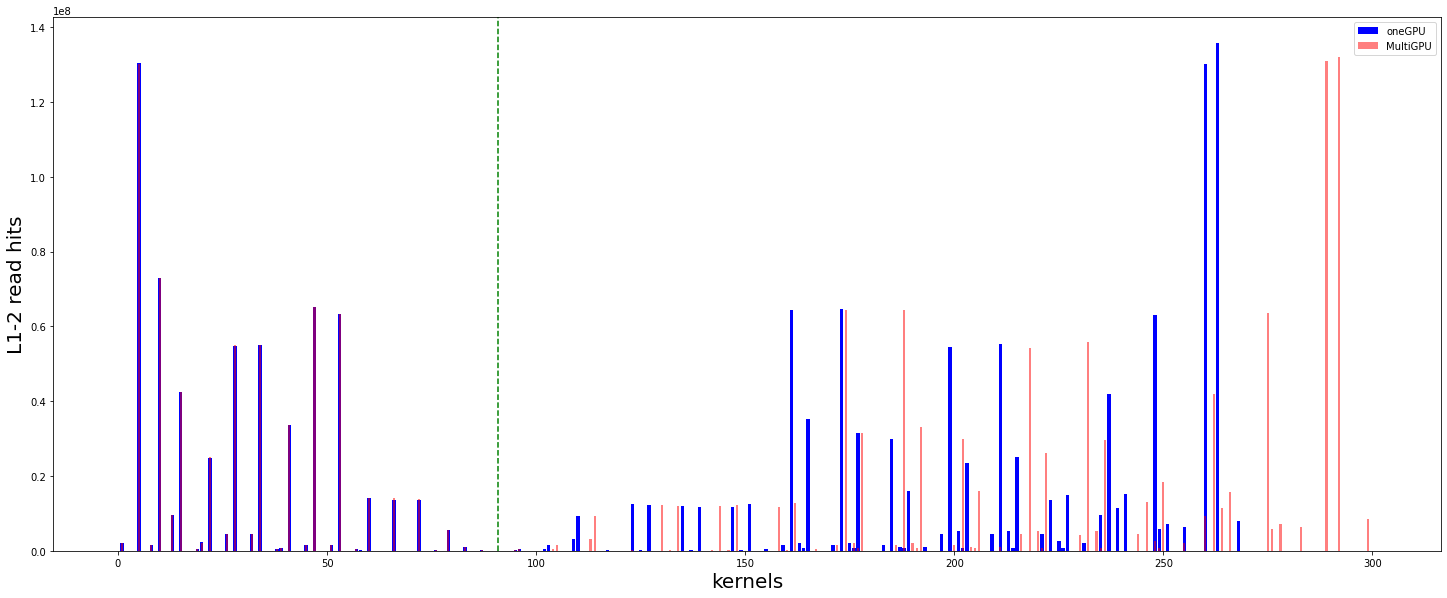

In [20]:
plot_bar_overlap(readhits_one, readhits_multi, delimeter=delimeter, ylabel='L1-2 read hits', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

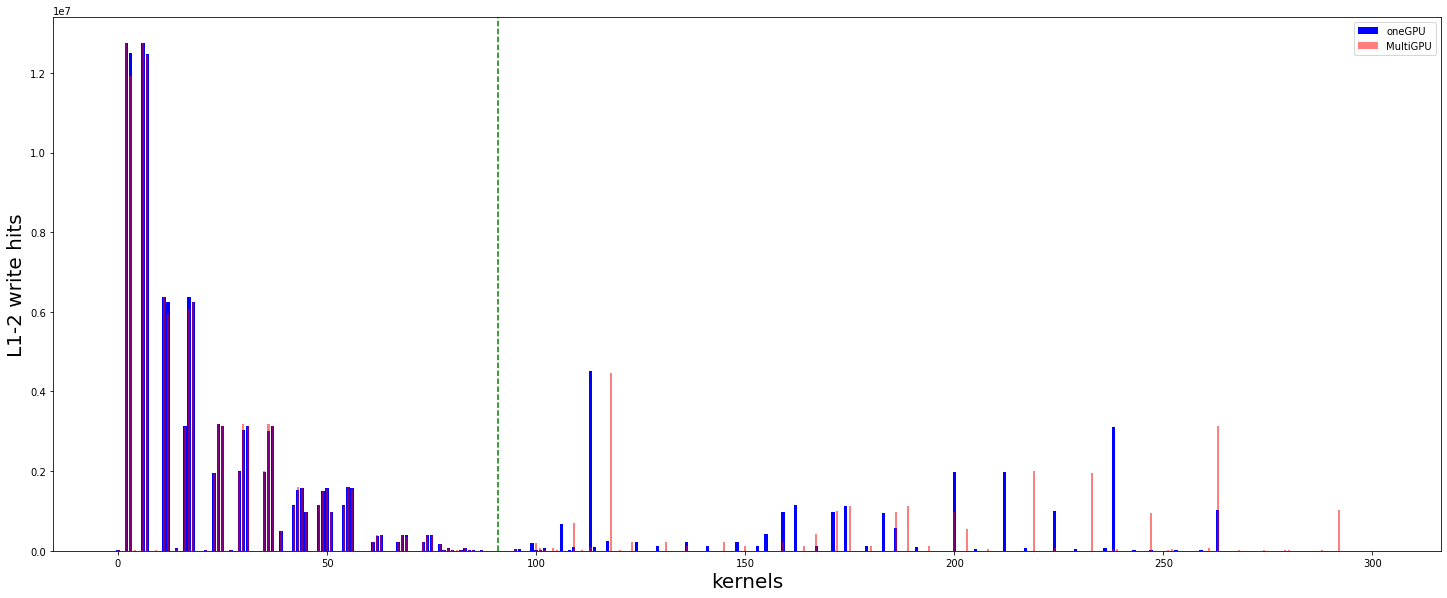

In [21]:
plot_bar_overlap(writehits_one, writehits_multi, delimeter=delimeter, ylabel='L1-2 write hits', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

## averages

### backward

In [25]:
rtr_back_one = RTR_one[delimeter:]
wtr_back_one = WTR_one[delimeter:]

rhr_back_one = RHR_one[delimeter:]
whr_back_one = WHR_one[delimeter:]

In [27]:
print("Av. OneGPU L1-2 read transactions (Backward): {}".format(rtr_back_one.mean()))
print("Av. OneGPU L1-2 write transactions (Backward): {}".format(wtr_back_one.mean()))
print("Av. OneGPU L1-2 read hit rate (Backward): {}".format(rhr_back_one.mean()))
print("Av. OneGPU L1-2 write hit rate (Backward): {}".format(whr_back_one.mean()))


Av. OneGPU L1-2 read transactions (Backward): 9703460.743016759
Av. OneGPU L1-2 write transactions (Backward): 2256578.25698324
Av. OneGPU L1-2 read hit rate (Backward): 36.03224513407821
Av. OneGPU L1-2 write hit rate (Backward): 35.0496725698324


In [28]:
rtr_back_multi = RTR_multi[delimeter:]
wtr_back_multi = WTR_multi[delimeter:]

rhr_back_multi = RHR_multi[delimeter:]
whr_back_multi = WHR_multi[delimeter:]

In [29]:
print("Av. MultiGPU L1-2 read transactions (Backward): {}".format(rtr_back_multi.mean()))
print("Av. MultiGPU L1-2 write transactions (Backward): {}".format(wtr_back_multi.mean()))
print("Av. MultiGPU L1-2 read hit rate (Backward): {}".format(rhr_back_multi.mean()))
print("Av. MultiGPU L1-2 write hit rate (Backward): {}".format(whr_back_multi.mean()))


Av. MultiGPU L1-2 read transactions (Backward): 8315347.777251185
Av. MultiGPU L1-2 write transactions (Backward): 1996313.7488151658
Av. MultiGPU L1-2 read hit rate (Backward): 24.95206023222749
Av. MultiGPU L1-2 write hit rate (Backward): 35.15796317535545


In [34]:
rhits_back_one = readhits_one[delimeter:]
whits_back_one = writehits_one[delimeter:]

rhits_back_multi = readhits_multi[delimeter:]
whits_back_multi = writehits_multi[delimeter:]

In [35]:
print("Av. OneGPU L1-2 read hits (Backward): {}".format(rhits_back_one.mean()))
print("Av. MultiGPU L1-2 read hits (Backward): {}".format(rhits_back_multi.mean()))

print("Av. OneGPU L1-2 write hits (Backward): {}".format(whits_back_one.mean()))
print("Av. MultiGPU L1-2 write hits (Backward): {}".format(whits_back_multi.mean()))


Av. OneGPU L1-2 read hits (Backward): 5569939.849249799
Av. MultiGPU L1-2 read hits (Backward): 4759695.222120905
Av. OneGPU L1-2 write hits (Backward): 128387.55297342979
Av. MultiGPU L1-2 write hits (Backward): 108465.79642774642


### forward

In [30]:
rtr_fwd_one = RTR_one[:delimeter]
wtr_fwd_one = WTR_one[:delimeter]

rhr_fwd_one = RHR_one[:delimeter]
whr_fwd_one = WHR_one[:delimeter]

In [31]:
print("Av. OneGPU L1-2 read transactions (Forward): {}".format(rtr_fwd_one.mean()))
print("Av. OneGPU L1-2 write transactions (Forward): {}".format(wtr_fwd_one.mean()))
print("Av. OneGPU L1-2 read hit rate (Forward): {}".format(rhr_fwd_one.mean()))
print("Av. OneGPU L1-2 write hit rate (Forward): {}".format(whr_fwd_one.mean()))


Av. OneGPU L1-2 read transactions (Forward): 10513995.483516483
Av. OneGPU L1-2 write transactions (Forward): 3141860.263736264
Av. OneGPU L1-2 read hit rate (Forward): 28.637211879120883
Av. OneGPU L1-2 write hit rate (Forward): 49.38428462637363


In [32]:
rtr_fwd_multi = RTR_multi[:delimeter]
wtr_fwd_multi = WTR_multi[:delimeter]

rhr_fwd_multi = RHR_multi[:delimeter]
whr_fwd_multi = WHR_multi[:delimeter]

In [33]:
print("Av. MultiGPU L1-2 read transactions (Forward): {}".format(rtr_fwd_multi.mean()))
print("Av. MultiGPU L1-2 write transactions (Forward): {}".format(wtr_fwd_multi.mean()))
print("Av. MultiGPU L1-2 read hit rate (Forward): {}".format(rhr_fwd_multi.mean()))
print("Av. MultiGPU L1-2 write hit rate (Forward): {}".format(whr_fwd_multi.mean()))


Av. MultiGPU L1-2 read transactions (Forward): 10503596.021978023
Av. MultiGPU L1-2 write transactions (Forward): 3141860.263736264
Av. MultiGPU L1-2 read hit rate (Forward): 28.9133608021978
Av. MultiGPU L1-2 write hit rate (Forward): 52.34476043956044


In [36]:
rhits_fwd_one = readhits_one[:delimeter]
whits_fwd_one = writehits_one[:delimeter]

rhits_fwd_multi = readhits_multi[:delimeter]
whits_fwd_multi = writehits_multi[:delimeter]

In [37]:
print("Av. OneGPU L1-2 read hits (Forward): {}".format(rhits_fwd_one.mean()))
print("Av. MultiGPU L1-2 read hits (Forward): {}".format(rhits_fwd_multi.mean()))

print("Av. OneGPU L1-2 write hits (Forward): {}".format(whits_fwd_one.mean()))
print("Av. MultiGPU L1-2 write hits (Forward): {}".format(whits_fwd_multi.mean()))

Av. OneGPU L1-2 read hits (Forward): 6823771.905017245
Av. MultiGPU L1-2 read hits (Forward): 6834988.985813089
Av. OneGPU L1-2 write hits (Forward): 1343089.462813454
Av. MultiGPU L1-2 write hits (Forward): 1333417.7133934838
